In [1]:
# ===== IMPORT LIBRARY =====
print(__doc__)

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from google.colab import files

Automatically created module for IPython interactive environment


In [2]:
# ===== UPLOAD FILE =====
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# ===== BACA DATASET =====
data = pd.read_csv("Mall_Customers.csv")

In [4]:
# Cek kolom dan isi awal data
print("5 baris pertama:")
print(data.head())

5 baris pertama:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# ===== AMBIL FITUR =====
# Kita gunakan fitur numerik yang cocok: Annual Income & Spending Score
X = data[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [6]:
# ===== STANDARDISASI (Opsional tapi umum di scikit-learn) =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

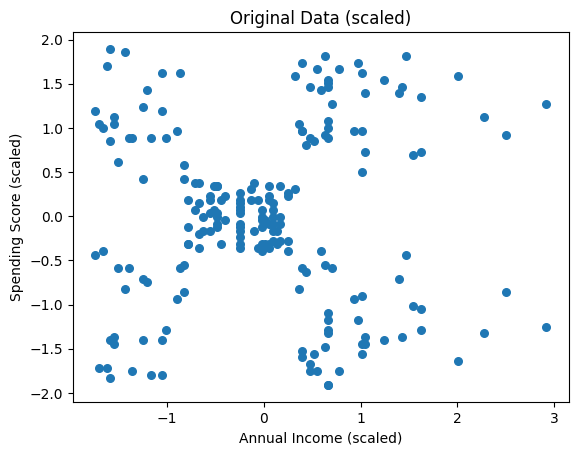

In [7]:
# ===== TAMPILKAN DATA (SCATTER SEBELUM CLUSTERING) =====
plt.figure(1)
plt.clf()

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Original Data (scaled)")
plt.show()

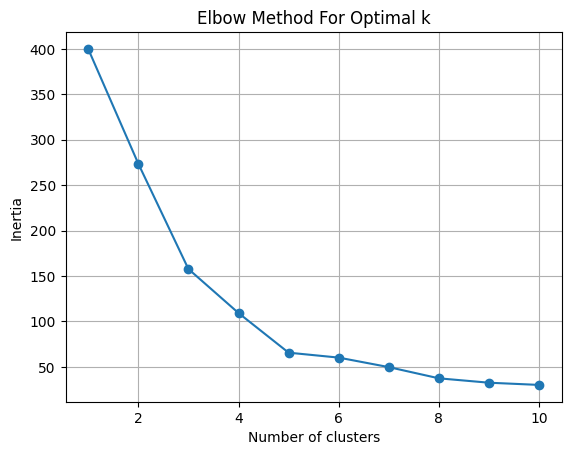

In [8]:
# ===== TENTUKAN JUMLAH CLUSTER DENGAN ELBOW METHOD =====
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(2)
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [9]:
# ===== FITTING K-MEANS FINAL DENGAN k = 5 =====
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

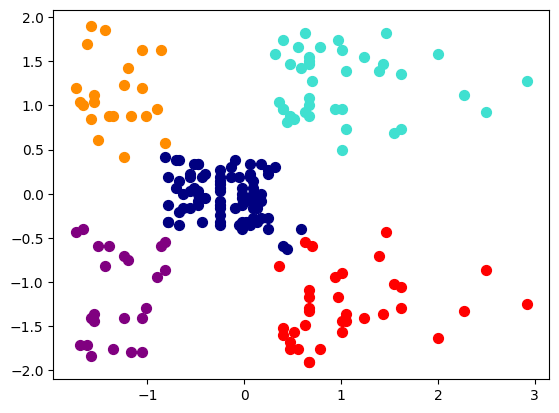

In [10]:
# ===== VISUALISASI HASIL CLUSTERING =====
plt.figure(3)
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for i in range(k):
    plt.scatter(X_scaled[y_pred == i, 0], X_scaled[y_pred == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

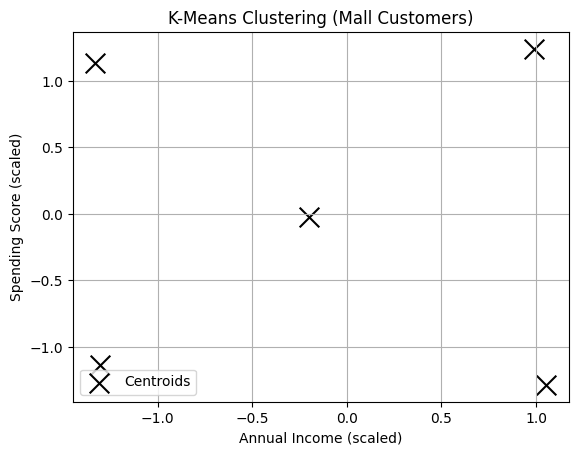

In [11]:
# Gambarkan pusat cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='x', label='Centroids')

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering (Mall Customers)")
plt.legend()
plt.grid(True)
plt.show()